In [1]:
# importo librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepocessing & Utils.
import sklearn
from sklearn.compose import ColumnTransformer

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

#Metricas
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
# ingesto datos
X_train = pd.read_csv('/content/X_train_processed.csv')

X_train.head(10)
X_train.shape

(5634, 27)

In [3]:
# ingesto datos
X_test = pd.read_csv('/content/X_test_processed.csv')
X_test.head(10)

,TotalCharges,tenure,MonthlyCharges,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.118441,0.263889,0.394803,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.811296,0.833333,0.978511,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.104432,0.180556,0.532234,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000185,0.013889,0.517241,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.490142,0.402778,0.590205,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.027931,0.041667,0.611694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.161015,0.319444,0.409795,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.005850,0.013889,0.508246,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.255679,0.402778,0.419790,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.386172,0.486111,0.758121,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# ingesto datos
Y_train = pd.read_csv('/content/Y_train.csv')
Y_train.head(10)

,Churn
0,0
1,0
2,0
3,1
4,1
5,0
6,1
7,0
8,0
9,1


In [5]:
# ingesto datos
Y_test = pd.read_csv('/content/Y_test.csv')
Y_test.head(10)

,Churn
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [6]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

print("Logistic Regression model initialized.")
print(f"Hyperparameter grid for Logistic Regression: {param_grid}")

Logistic Regression model initialized.
Hyperparameter grid for Logistic Regression: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}


In [7]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, Y_train['Churn'])

print("GridSearchCV completed.")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV completed.


In [8]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 100, 'solver': 'liblinear'}


In [9]:
best_logreg_model = grid_search.best_estimator_
print("Best Logistic Regression model retrieved from GridSearchCV.")

Best Logistic Regression model retrieved from GridSearchCV.


In [10]:
Y_pred = best_logreg_model.predict(X_test)
Y_pred_proba = best_logreg_model.predict_proba(X_test)[:, 1]

print("Predictions on X_test generated.")

Predictions on X_test generated.


In [11]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the best Logistic Regression model: {accuracy:.4f}")

Accuracy of the best Logistic Regression model: 0.7864


In [12]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[924 117]
 [184 184]]


In [13]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc_score = auc(fpr, tpr)
print(f"ROC AUC score of the best Logistic Regression model: {roc_auc_score:.4f}")

ROC AUC score of the best Logistic Regression model: 0.8129


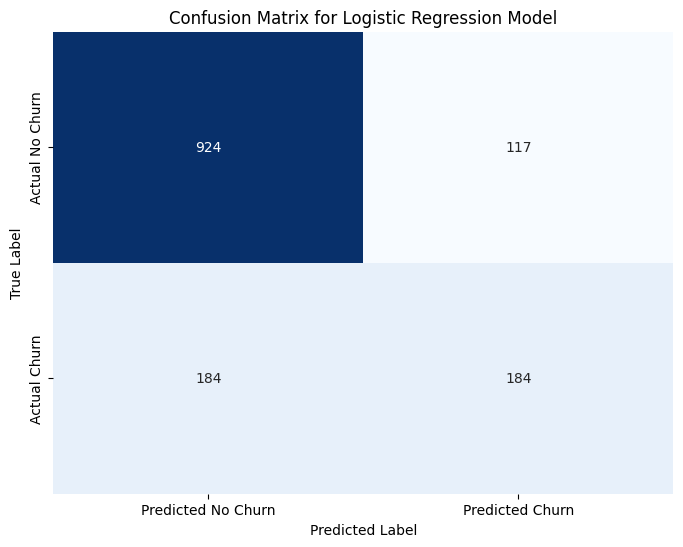

Confusion matrix visualized.


In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
print("Confusion matrix visualized.")

Experimento: Utilizamos la tabla con dimensionalidad reducida, de 27 dimensiones a 12

In [15]:
X_train = pd.read_csv('/content/X_train_pca.csv')
X_test = pd.read_csv('/content/X_test_pca.csv')

(5634, 1)

In [24]:
X_train.shape

(5634, 12)

In [25]:
X_test.shape

(1409, 12)

In [16]:
logreg2 = LogisticRegression(random_state=41, max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

print("Logistic Regression model initialized.")
print(f"Hyperparameter grid for Logistic Regression: {param_grid}")

Logistic Regression model initialized.
Hyperparameter grid for Logistic Regression: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}


In [17]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, Y_train['Churn'])

print("GridSearchCV completed.")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV completed.


In [18]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 100, 'solver': 'liblinear'}


In [19]:
best_logreg_model = grid_search.best_estimator_
print("Best Logistic Regression model retrieved from GridSearchCV.")

Best Logistic Regression model retrieved from GridSearchCV.


In [20]:
Y_pred = best_logreg_model.predict(X_test)
Y_pred_proba = best_logreg_model.predict_proba(X_test)[:, 1]

print("Predictions on X_test generated.")

Predictions on X_test generated.


In [21]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the best Logistic Regression model: {accuracy:.4f}")

Accuracy of the best Logistic Regression model: 0.7842


In [22]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc_score = auc(fpr, tpr)
print(f"ROC AUC score of the best Logistic Regression model: {roc_auc_score:.4f}")

ROC AUC score of the best Logistic Regression model: 0.8087


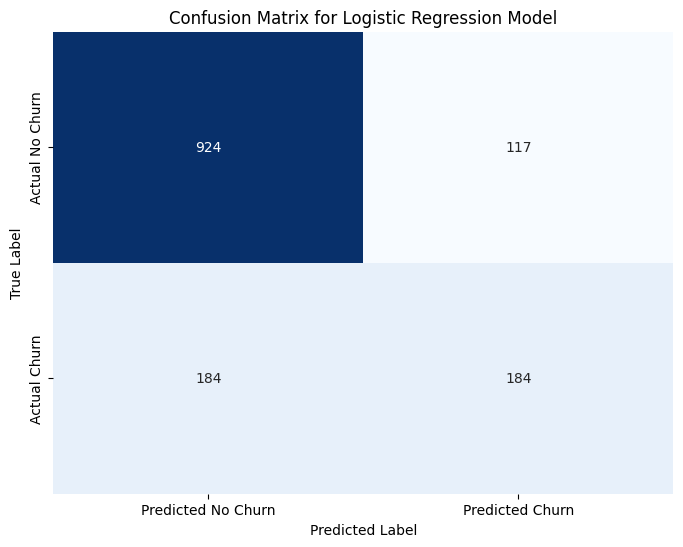

Confusion matrix visualized.


In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
print("Confusion matrix visualized.")